<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Hadson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mão na massa #02

Aluno:
Gleydiston Bragança Martins dos santos

In [1]:
!pip install networkx
!pip install matplotlib
!pip install pandas
!pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
df = pd.read_csv('/content/facebook_combined.txt')
%matplotlib inline

# Informações sobre a base de dados utilizada
A base de dados obtidata em https://snap.stanford.edu/data/ego-Facebook.html refere-se a um conjunto de informações coletadas por participantes de uma pesquisa do facebook. Através dos dados obtidos foi possivel registrar um conjunto de networks entre usuários da plataforma, além de informações como interesses, atividades, ou outras características dos usuários.

In [ ]:
df.info()

In [ ]:
df.tail


In [28]:
G_fb = nx.read_edgelist("/content/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

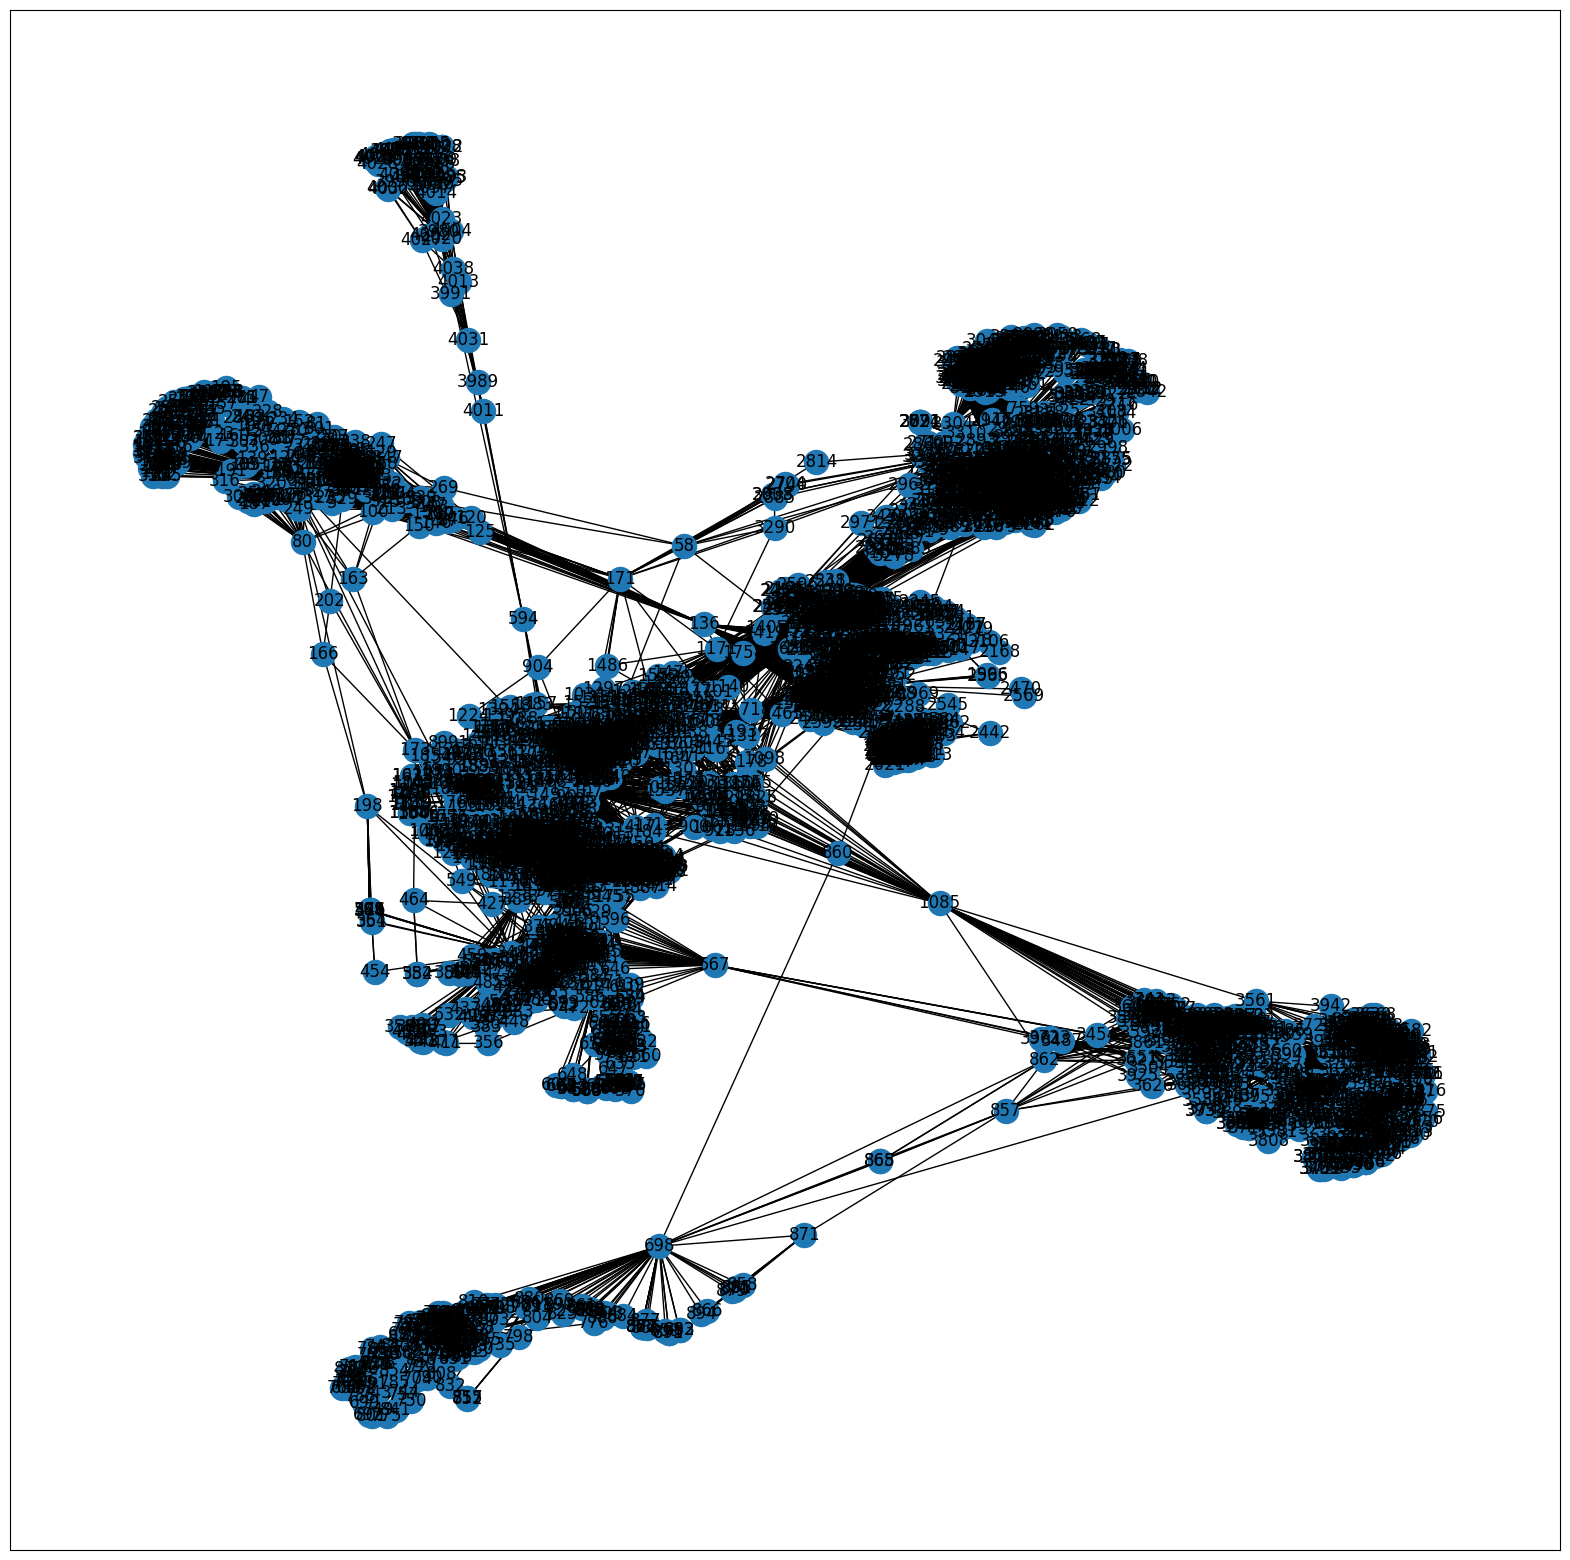

In [29]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

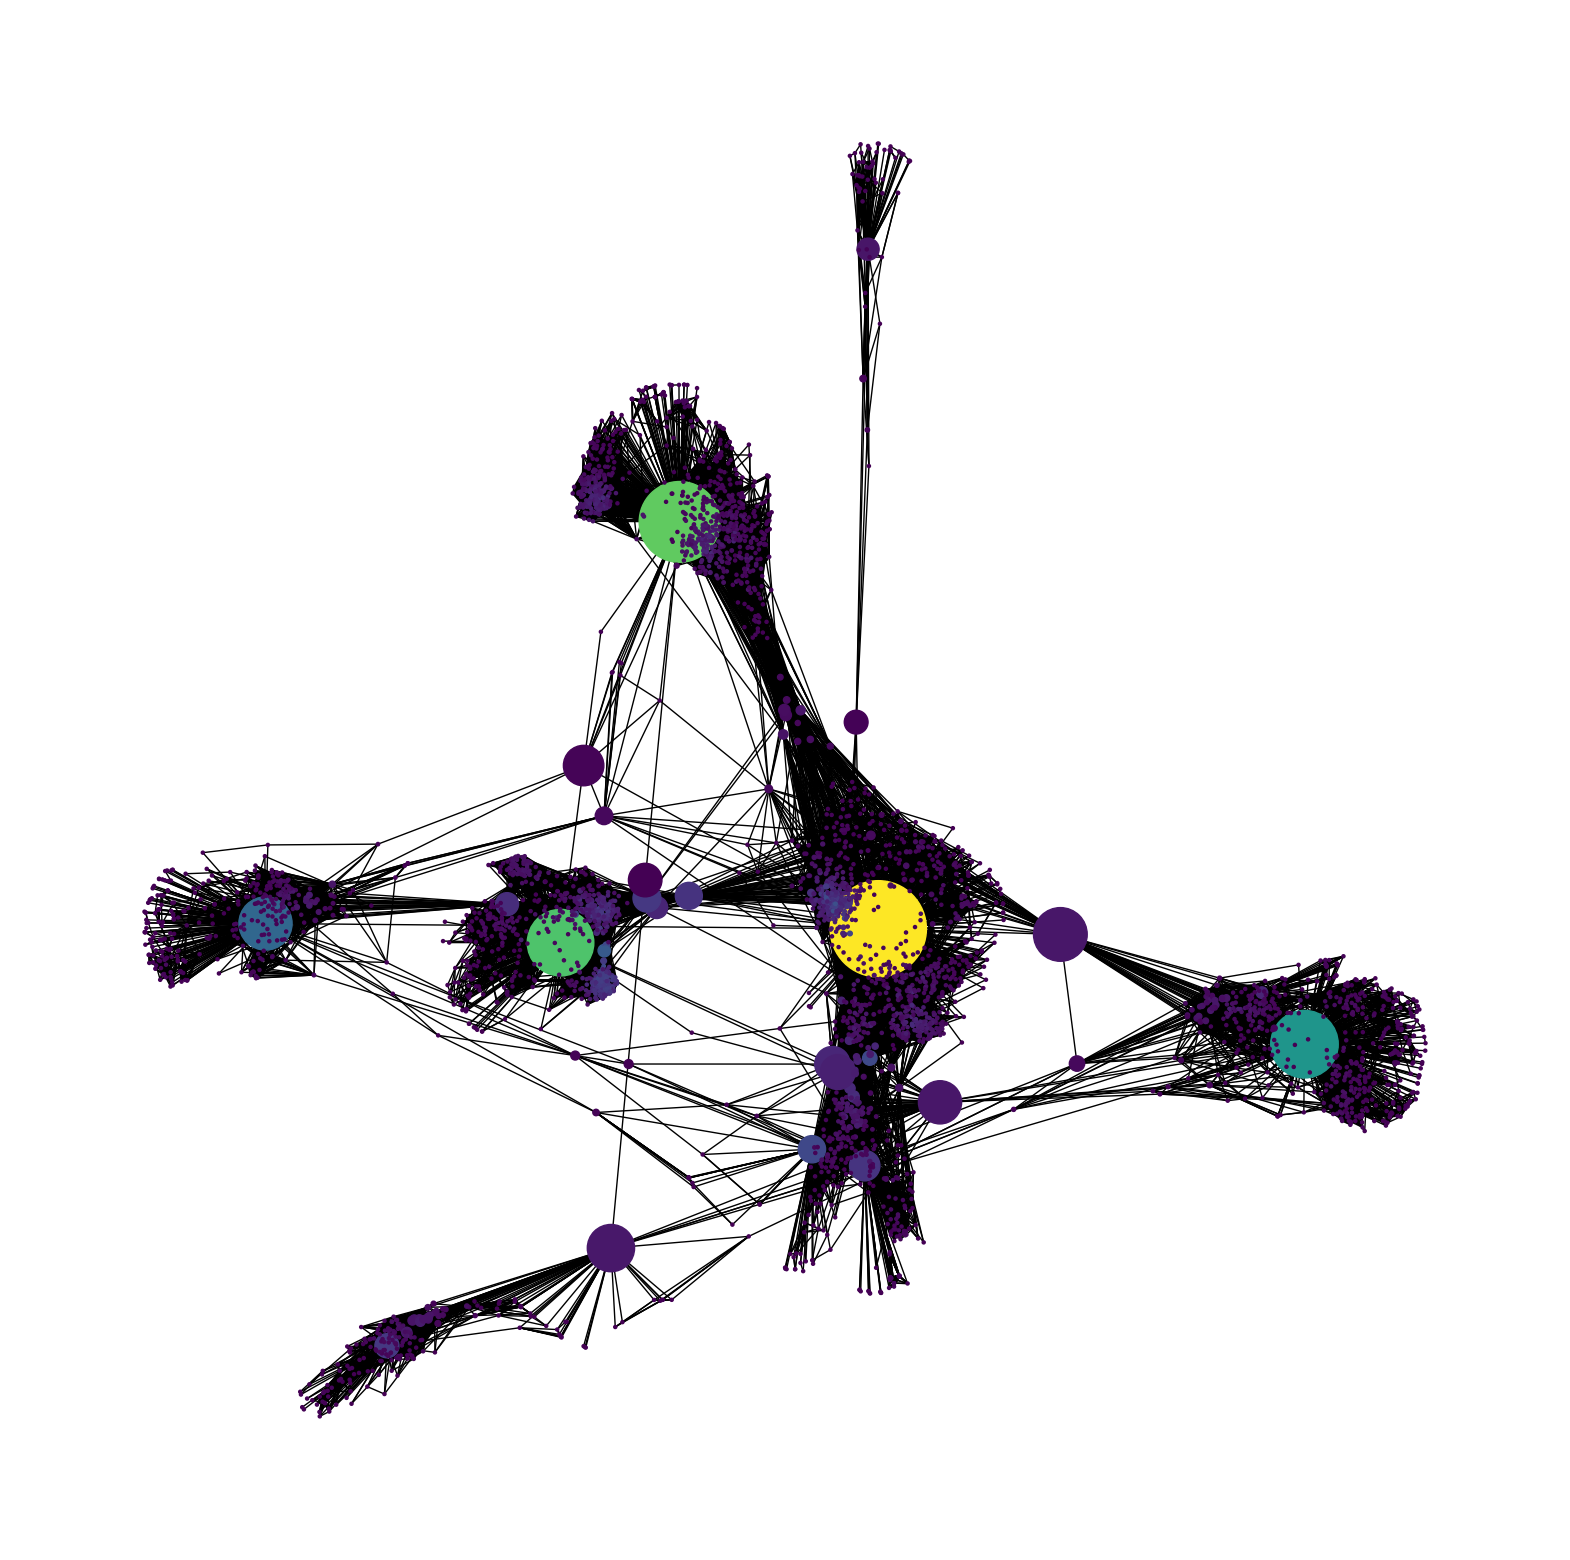

In [30]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [33]:
colors = ["" for x in range(G_fb.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G_fb):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

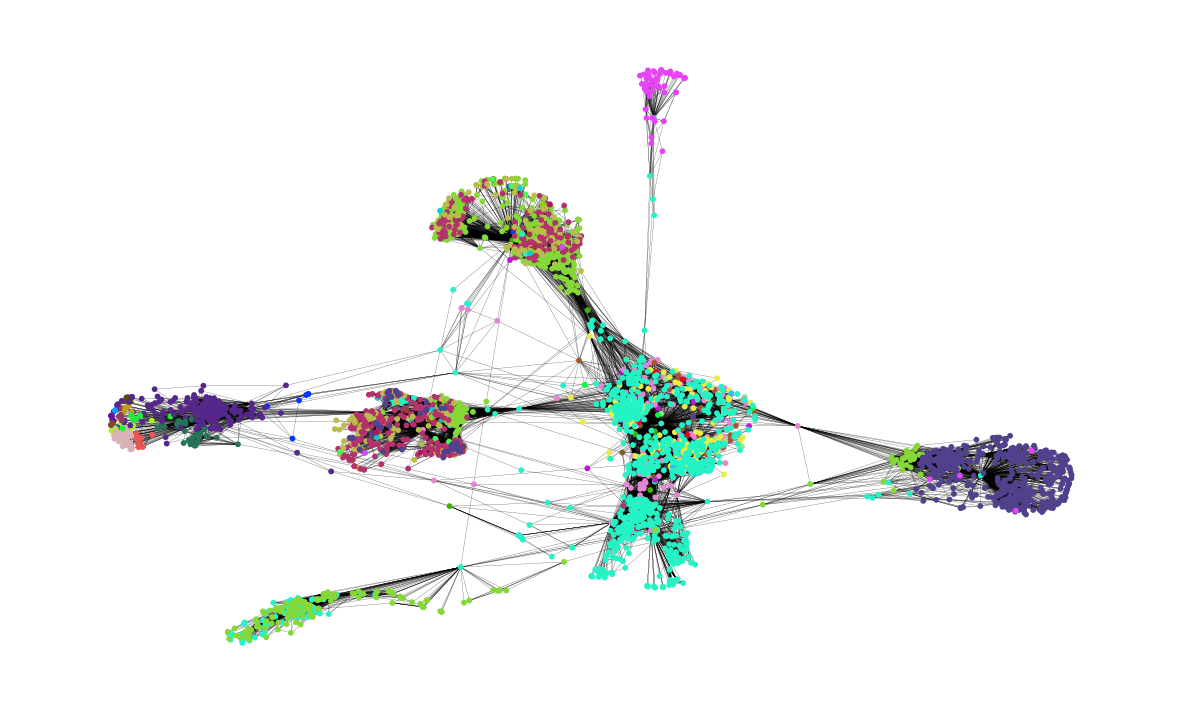

In [34]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G_fb, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

# Conclusão
Nesta análise detalhada da rede social do Facebook, exploramos a complexidade da estrutura de conexões, apesar das limitações impostas pela anonimização e proteção dos dados individuais. Um dos principais pontos de foco foi a medição da densidade da rede, ou seja, quantas conexões, em média, cada usuário mantém. Isso nos forneceu insights sobre o grau de interconectividade entre os usuários, revelando se a rede é caracterizada por amplas redes de amizades ou por grupos mais fechados.

Além disso, concentramos nossa atenção na identificação de usuários-chave com alta centralidade na rede. Esses 'atores centrais' desempenham um papel fundamental na propagação de informações e na conectividade geral da rede, e sua identificação é crucial para entender como a informação se espalha.

Essas análises ofereceram uma visão profunda das dinâmicas da rede social, apesar das medidas rigorosas de privacidade dos usuários. Os insights obtidos têm implicações valiosas para pesquisadores e profissionais interessados em aprimorar estratégias em plataformas de mídia social, bem como para estudiosos que desejam explorar as nuances das interações humanas em ambientes online.